In [1]:
import sys
sys.path.append("/Users/aaron/phd/impact-of-contamination-on-taxonomy")

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from workflow.fastani_contig_split.z_run_for_specific_case import FastAniContigSplitZRunForSpecificCase

DF_DATA = FastAniContigSplitZRunForSpecificCase(target_pct=50, query_gid='GCA_900759445.1').output().maybe_read_cached()
DF_DATA.head()

,GCA_000759755.1,GCA_900759445.1,GCF_000155975.1,GCF_000215745.1,GCF_000735435.1,GCF_000742135.1,GCF_000751755.1,GCF_000828055.2,GCF_001037495.1,GCF_001598295.1,...,GCF_015672735.1,GCF_016811995.1,GCF_018035235.1,GCF_018342065.1,GCF_900079995.3,GCF_900200035.1,GCF_900978845.1,GCF_902158555.1,TEST_GCA_900759445.1,query
GCA_000759755.1,100.0000,85.9519,93.0710,81.1964,80.9812,81.0022,81.0608,81.1125,86.7539,80.9710,...,87.0163,83.6252,90.1364,87.7538,91.4062,81.3245,80.8768,81.3303,81.3575,GCA_900759445.1
GCA_900759445.1,85.9519,100.0000,86.0170,82.9998,94.9645,83.1169,83.1763,83.1421,83.5885,92.4209,...,83.4276,81.7120,86.4934,84.1136,87.5252,84.0514,82.7770,83.4674,100.0000,GCA_900759445.1
GCF_000155975.1,93.0710,86.0170,100.0000,81.1595,81.2770,81.2834,81.2384,81.3194,86.9012,81.1709,...,87.0883,84.0227,90.2776,87.7982,91.1641,81.2873,81.1888,81.7635,81.4192,GCA_900759445.1
GCF_000215745.1,81.1964,82.9998,81.1595,100.0000,83.7736,86.1990,85.8644,86.4318,80.9215,83.8647,...,81.1114,81.2324,81.1292,81.1387,81.2657,84.1624,86.0003,83.7931,84.2770,GCA_900759445.1
GCF_000735435.1,80.9812,94.9645,81.2770,83.7736,100.0000,83.9425,83.9932,83.8252,80.7329,95.7194,...,80.8349,80.9437,81.0037,81.1505,81.1340,84.7257,83.5624,84.2181,99.4535,GCA_900759445.1


In [4]:
from workflow.external.gtdb_metadata import GtdbMetadataR207

DF_META = GtdbMetadataR207().output().maybe_read_cached()
DF_META.head()

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,gtdb_type_species_of_genus,ncbi_taxonomy,ncbi_taxonomy_unfiltered,domain,phylum,class,order,family,genus,species
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,f,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,d__Bacteria;x__Terrabacteria group;p__Firmicut...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae_G,g__Bacillus_A,s__Bacillus_A anthracis
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,t,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium nucleatum
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas,s__Xanthomonas oryzae
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,t,d__Archaea;p__Nanoarchaeota;c__;o__Nanoarchaea...,d__Archaea;x__DPANN group;p__Nanoarchaeota;o__...,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales_A,f__Enterobacteriaceae_A,g__Wigglesworthia,s__Wigglesworthia glossinidia_A


In [27]:
del DF_DATA['query']

KeyError: 'query'

In [75]:


d_genus_to_colour = {
    'g__Citrobacter': 'red',
    'g__Klebsiella': 'blue'
}




gids_of_interest = ['TEST_GCA_900759445.1', 'GCA_900759445.1', 'GCF_000735435.1', 'GCF_002075345.1',
                    'GCF_001598295.1', 'GCF_006711645.1',
                    'GCF_011064845.1', 'GCF_004353845.1']

data_subset = np.zeros((len(gids_of_interest), len(gids_of_interest)))

columns_subset = [x for x in DF_DATA.columns if x in gids_of_interest]

colours = ['blue', 'black', 'green', 'red', 'orange', 'orange', 'yellow', 'yellow']

for i, gid in enumerate(gids_of_interest):
    for j, gid2 in enumerate(gids_of_interest):
        data_subset[i, j] = DF_DATA.loc[gid, gid2]
#
# df_data_np = DF_DATA.to_numpy()
#
# for i, gid in enumerate(columns):
#     for j, gid2 in enumerate(columns):
#         data_subset[i, j] = DF_DATA.loc[gid, gid2]
#
#
# for gid in DF_DATA.columns:
#     if gid.startswith('TEST_'):
#         colours.append('green')
#     elif gid == 'GCA_900759445.1':
#         colours.append('yellow')
#     elif gid == 'GCF_000735435.1':
#         colours.append('orange')  #  planticola
#     elif gid == 'GCF_002075345.1':
#         colours.append('black')  # braaki
#     else:
#         colours.append(d_genus_to_colour[DF_META.loc[gid, 'genus']])


In [71]:
DF_DATA.columns[[18]]

Index(['GCF_004353845.1'], dtype='object')

<Figure size 1000x600 with 0 Axes>

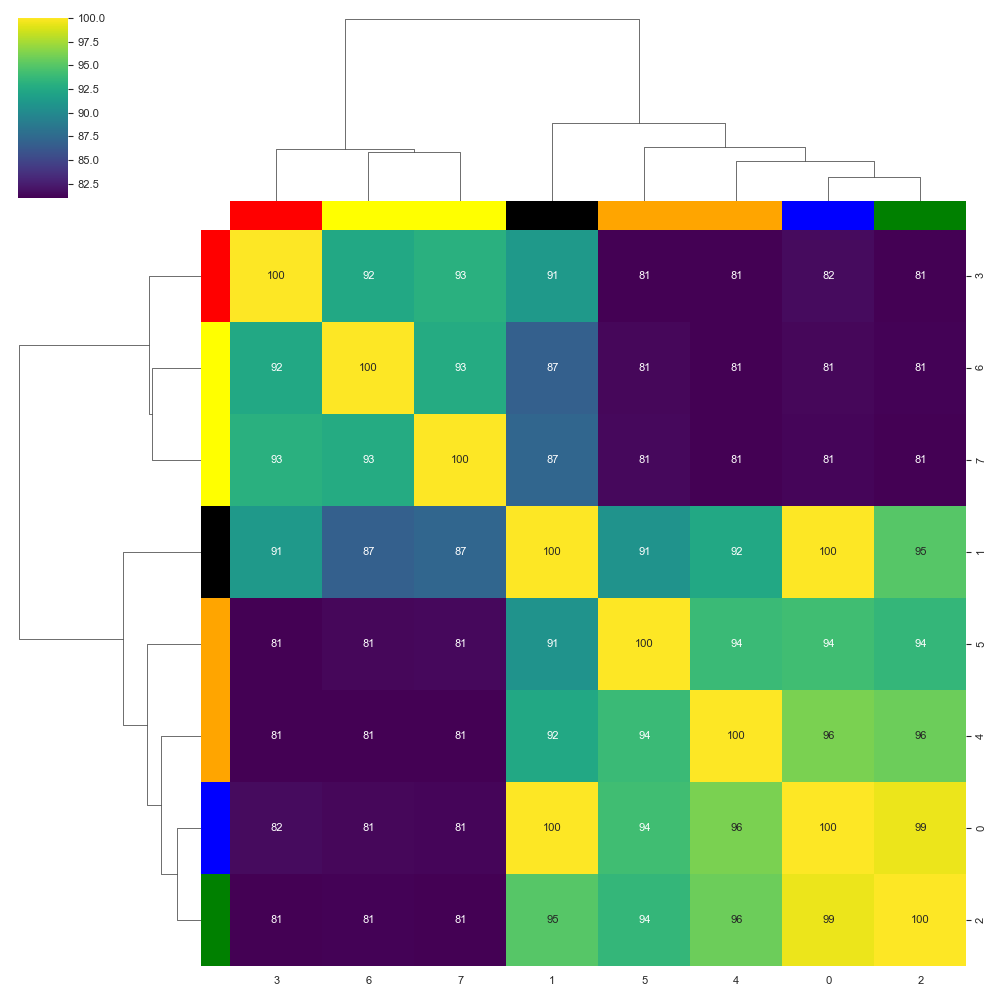

In [76]:
plt.figure(figsize=(10, 6))
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 8})
# g = sns.clustermap(df, annot=True, cmap='viridis',  fmt='.1f')

g = sns.clustermap(data_subset, row_colors=colours, col_colors=colours, annot=True, cmap='viridis', fmt='.0f')

plt.savefig('/tmp/citro_kelb.svg')

<Figure size 1000x600 with 0 Axes>

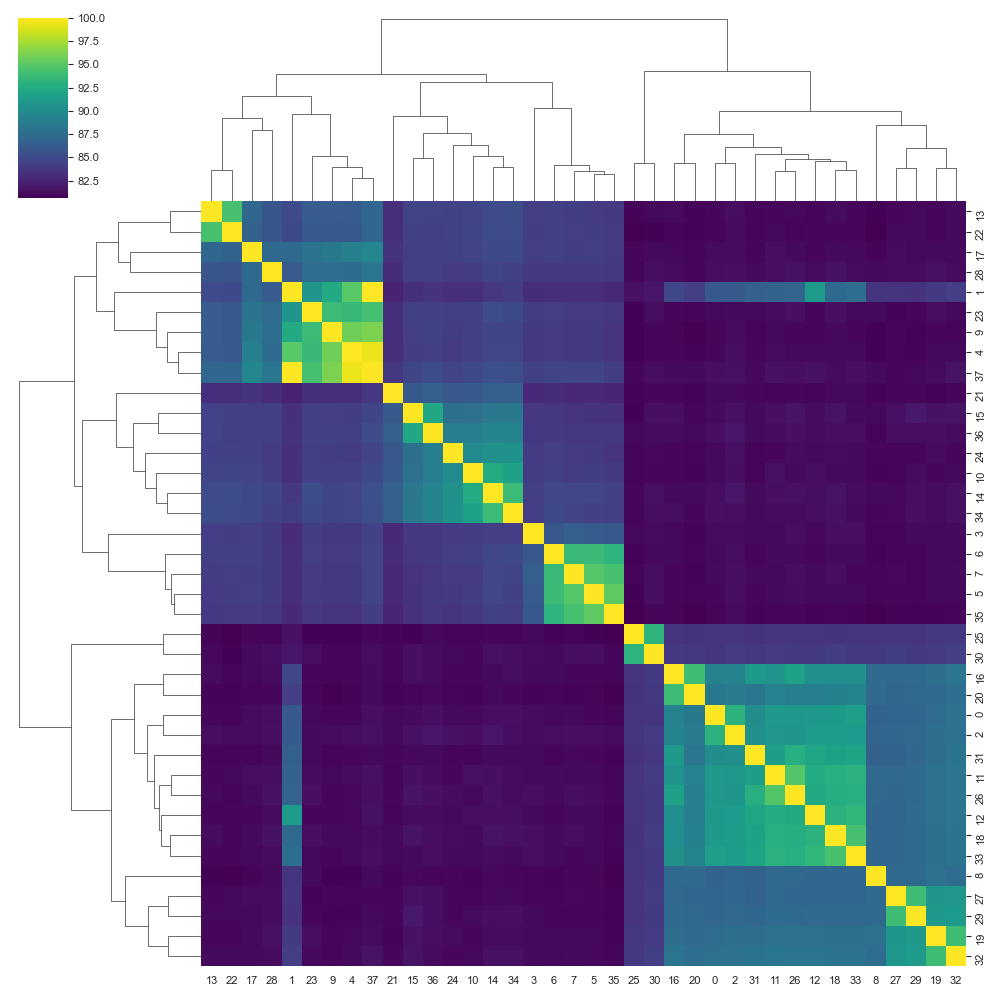

In [61]:
plt.figure(figsize=(10, 6))
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 8})
# g = sns.clustermap(df, annot=True, cmap='viridis',  fmt='.1f')

g = sns.clustermap(DF_DATA.to_numpy(), annot=False, cmap='viridis', fmt='.0f')

# g = sns.clustermap(data_subset, row_colors=colours, col_colors=colours, annot=True, cmap='viridis', fmt='.0f')

plt.savefig('/tmp/citro_kelb.svg')